# Homework #6

Carina Cheng

# 1) Load Data

In [1]:
import glob
from skimage import io
import numpy as np

names = [] # will hold all the class names
images = [] # will hold images
name0 = 'airplanes' # initial name
print("Loading images...")
for file in glob.glob("50_categories/*/*"):
    name = file.split('/')[1]
    names.append(name)
    image = io.imread(file)
    images.append(image)
    if name != name0:
        print(' ',name0,':',str(len(glob.glob("50_categories/"+name0+'/*')))+" images")
        name0 = name
    
images = np.array(images)
names = np.array(names)
print("Loaded",len(names),"total images")

Loading images...
  airplanes : 533 images
  bat : 71 images
  bear : 68 images
  blimp : 57 images
  camel : 73 images
  comet : 81 images
  conch : 69 images
  cormorant : 71 images
  crab : 57 images
  dog : 68 images
  dolphin : 71 images
  duck : 58 images
  elephant : 87 images
  elk : 67 images
  frog : 77 images
  galaxy : 54 images
  giraffe : 56 images
  goat : 75 images
  goldfish : 62 images
  goose : 73 images
  gorilla : 141 images
  helicopter : 59 images
  horse : 180 images
  hot-air-balloon : 59 images
  hummingbird : 77 images
  iguana : 71 images
  kangaroo : 55 images
  killer-whale : 61 images
  leopards : 127 images
  llama : 79 images
  mars : 104 images
  mussels : 116 images
  octopus : 74 images
  ostrich : 73 images
  owl : 80 images
  penguin : 99 images
  porcupine : 67 images
  raccoon : 93 images
  saturn : 64 images
  skunk : 54 images
  snail : 79 images
  snake : 75 images
  speed-boat : 67 images
  starfish : 54 images
  swan : 77 images
  teddy-bear

# 2) Extract Features

In [2]:
from sklearn.preprocessing import Imputer
from scipy import signal
from skimage.filters import roberts
from skimage.feature import canny
from skimage.feature import shape_index
from skimage.filters import threshold_local
from skimage.feature import corner_harris
from skimage.segmentation import slic

def get_features(image):
    """
    Obtains features for an image.
        Input: image data (typically 3-dimensions, where the 3rd dimension is color)
        Outputs: array of features
            1) Array size in x-dimension
            2) Array size in y-dimension
            3) Average of red channel colors
            4) Average of green channel colors
            5) Average of blue channel colors
            6) Cross-correlation between red and green colors
            7) Cross-correlation between red and blue colors
            8) Cross-correlation between green and blue colors
            9) Edge detection (fraction of edge pixels in image)
            10) Contrast (variation of pixel values in image)
            11) Binary (fraction of 1's in binary version of image)
            12) Shape (average of measures of curvature in image)
            13) Corners (average of corner detections)
            14) Segmentation (sum of all segmentation detections)
            15) Aspect Ratio (ratio of x:y array size)
    """
    f1 = image.shape[:2][0] # x-dimension size
    f2 = image.shape[:2][1] # y-dimension size
    try: # if color channels exist
        f3 = np.mean(image[:,:,0]) 
        f4 = np.mean(image[:,:,1]) 
        f5 = np.mean(image[:,:,2]) 
        f6 = np.mean(np.corrcoef(image[:,:,0],image[:,:,1]))
        f7 = np.mean(np.corrcoef(image[:,:,0],image[:,:,2]))
        f8 = np.mean(np.corrcoef(image[:,:,1],image[:,:,2]))
        image2d = np.mean(image,axis=2) # average all color channels
    except: 
        f3, f4, f5, f6, f7, f8 = np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
        image2d = image 
    img_size = (image2d.shape[0]*image2d.shape[1])*100 # image size to scale many features by
    
    edge = canny(image2d, sigma=4) # tracing of edges
    f9 = np.sum(edge)/(edge.shape[0]*edge.shape[1]) # sum of edge pixels scaled by image size
    
    f10 = np.std(image2d)/np.max(image2d) # standard deviation of pixel values scaled by maximum value 
    
    block_size = 51
    adaptive_thresh = threshold_local(image2d, block_size)
    binary = image2d > adaptive_thresh
    f11 = np.sum(binary)/img_size # sum of binary image 
    
    shape = shape_index(image2d,sigma=10)
    f12 = np.sum(shape)/img_size # sum of shape
    
    corner = corner_harris(image2d,k=0.1,sigma=4)
    f13 = np.mean(corner)/np.sum(corner)*1e7 # scaled by sum
    
    seg = slic(image2d)
    f14 = np.sum(seg)/img_size # sum of segmentations
    
    f15 = f1/f2 # aspect ratio
    
    features = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15]
    feature_names = ['array size in x-dimension', 'array size in y-dimension', 'average of red channel colors',
                     'average of green channel colors', 'average of blue channel colors',
                    'cross-correlation between red and green', 'cross-correlation between red and blue',
                    'cross-correlation between green and blue', 'edge detection', 'contrast','binary','shape',
                    'corners','segmentation','aspect ratio']
    return np.array(features), feature_names

# Loop over all images and extract features
order = np.arange(len(names)) 
np.random.shuffle(order) # randomly shuffle the order
names = names[order]
images = images[order]
data = [] # will hold features of each image
for ii,image in enumerate(images): 
    if (ii+1) % 1000 == 0: print(ii+1,'/',len(images))
    row, feature_names = get_features(image)
    data.append(row) 
data = np.array(data)

# Fill in missing values
imp = Imputer(missing_values=np.nan, strategy='mean', axis=0) # mean over images
data = imp.fit_transform(data)

print("Data has shape",data.shape,"= (number of images, number of features)")

/anaconda2/envs/conda3/lib/python3.6/site-packages/skimage/feature/corner.py:373: RuntimeWarning: invalid value encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))
/anaconda2/envs/conda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda2/envs/conda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/anaconda2/envs/conda3/lib/python3.6/site-packages/skimage/feature/corner.py:373: RuntimeWarning: divide by zero encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))


1000 / 4244
2000 / 4244
3000 / 4244
4000 / 4244
Data has shape (4244, 15) = (number of images, number of features)


# 3) Compute Model and Find Important Features

Saving clf_basic.pkl
Optimal Model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Saving clf_opt.pkl


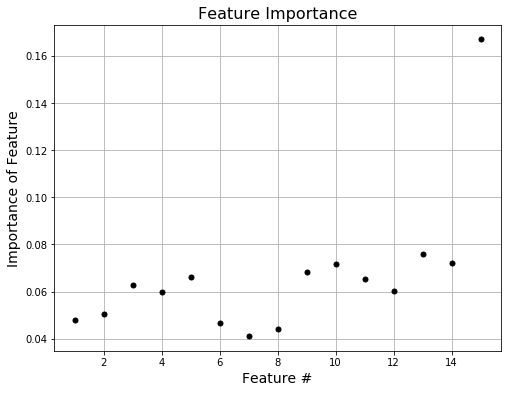

The three most important features are:

1. aspect ratio 

2. corners 

3. segmentation 



In [4]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import math
import logging
from sklearn.externals import joblib
import matplotlib.pyplot as plt

X = data
Y = names

# Divide test and training sets
half = math.floor(len(Y)/2) # cut data in half 
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]

# Save data
np.savez('Image_Data.npz',train_X=train_X,train_Y=train_Y,test_X=test_X,test_Y=test_Y,names=names)

# Build basic random forest classifier
clf_basic = RandomForestClassifier(n_estimators=10) 
clf_basic.fit(train_X, train_Y)

# Save basic model
joblib.dump(clf_basic, 'clf_basic.pkl') # save classifier
print("Saving clf_basic.pkl")

# Find optimal classifier
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
parameters = {'n_estimators':[10,20,30,40,50,60,70,80,90,100],  'max_features':[X.shape[1]], 
             'criterion': ['gini','entropy']}
rf_tune = model_selection.GridSearchCV(RandomForestClassifier(), parameters, 
                                   n_jobs = -1, cv = 5, verbose = 0) # loops over all possibilities
rf_opt = rf_tune.fit(train_X, train_Y)

# Save optimal model
print("Optimal Model:\n" + str(rf_opt.best_estimator_))
clf_opt = rf_opt.best_estimator_
joblib.dump(clf_opt, 'clf_opt.pkl') # save classifier
print("Saving clf_opt.pkl")

# Find 3 most important features
feature_importances = rf_opt.best_estimator_.feature_importances_
plt.figure(figsize=(8,6))
plt.plot(np.arange(len(feature_importances))+1,feature_importances,'k.',markersize=10)
plt.xlabel('Feature #', fontsize=14)
plt.ylabel('Importance of Feature', fontsize=14)
plt.title('Feature Importance', fontsize=16)
plt.grid()
plt.show()
feature_order = np.argsort(np.array(feature_importances))[::-1]
print("The three most important features are:\n")
print("1.",feature_names[feature_order[0]],"\n")
print("2.",feature_names[feature_order[1]],"\n")
print("3.",feature_names[feature_order[2]],"\n")

# Compute Metrics

Percentage of correct identifications: 0.302544769086
Percentage using pure guessing: 0.02

Confusion Matrix for Optimal CLF:


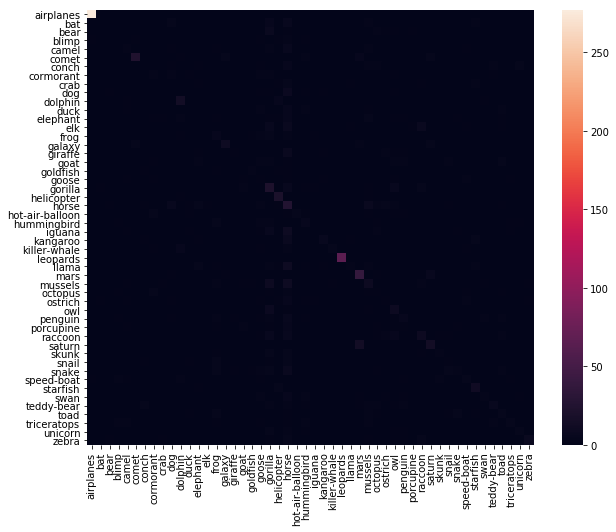

In [1]:
%matplotlib inline
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import numpy as np

# Re-load models and data
clf_basic = joblib.load('clf_basic.pkl')  
clf_opt = joblib.load('clf_opt.pkl')
img_data = np.load('Image_Data.npz')
testX = img_data['test_X']
testY = img_data['test_Y']
names = img_data['names']

# Look at results from basic clf
#Y_pred = clf_basic.predict(testX) 
#loss_basic = metrics.zero_one_loss(testY, Y_pred) # zero-one loss
#print("Percentage of correct identifications:", 1-loss_basic)
#print("Percentage using pure guessing:", 1/50.)

# Show confusion matrix
#rf_confmat = metrics.confusion_matrix(testY, Y_pred) 
#print("\nConfusion Matrix for Basic CLF:")
#plt.figure(figsize=(10,8))
#sns.heatmap(rf_confmat, annot=False,  fmt='', 
#            xticklabels=[str(x) for x in np.unique(names)], yticklabels=[str(x) for x in np.unique(names)])
#plt.show()

# Look at results from optimal clf
Y_pred = clf_opt.predict(testX)
loss_opt = metrics.zero_one_loss(testY, Y_pred) # zero-one loss
print("Percentage of correct identifications:", 1-loss_opt)
print("Percentage using pure guessing:", 1/50.)

# Show confusion matrix
rf_confmat = metrics.confusion_matrix(testY, Y_pred) 
print("\nConfusion Matrix for Optimal CLF:")
plt.figure(figsize=(10,8))
sns.heatmap(rf_confmat, annot=False,  fmt='', 
            xticklabels=[str(x) for x in np.unique(names)], yticklabels=[str(x) for x in np.unique(names)])
plt.show()

# 4) Final Classifier

In [4]:
from sklearn.externals import joblib
import glob
from skimage import io
import numpy as np
from sklearn.preprocessing import Imputer
from scipy import signal
from skimage.filters import roberts
from skimage.feature import canny
from skimage.feature import shape_index
from skimage.filters import threshold_local
from skimage.feature import corner_harris
from skimage.segmentation import slic

# Path and name of directory with .jpg images
PATH = '50_categories/bat' # XXX edit this!

# Feature function (same one as above)
def get_features(image):
    """
    Obtains features for an image.
        Input: image data (typically 3-dimensions, where the 3rd dimension is color)
        Outputs: array of features
            1) Array size in x-dimension
            2) Array size in y-dimension
            3) Average of red channel colors
            4) Average of green channel colors
            5) Average of blue channel colors
            6) Cross-correlation between red and green colors
            7) Cross-correlation between red and blue colors
            8) Cross-correlation between green and blue colors
            9) Edge detection (fraction of edge pixels in image)
            10) Contrast (variation of pixel values in image)
            11) Binary (fraction of 1's in binary version of image)
            12) Shape (average of measures of curvature in image)
            13) Corners (average of corner detections)
            14) Segmentation (sum of all segmentation detections)
            15) Aspect Ratio (ratio of x:y array size)
    """
    f1 = image.shape[:2][0] # x-dimension size
    f2 = image.shape[:2][1] # y-dimension size
    try: # if color channels exist
        f3 = np.mean(image[:,:,0]) 
        f4 = np.mean(image[:,:,1]) 
        f5 = np.mean(image[:,:,2]) 
        f6 = np.mean(np.corrcoef(image[:,:,0],image[:,:,1]))
        f7 = np.mean(np.corrcoef(image[:,:,0],image[:,:,2]))
        f8 = np.mean(np.corrcoef(image[:,:,1],image[:,:,2]))
        image2d = np.mean(image,axis=2) # average all color channels
    except: 
        f3, f4, f5, f6, f7, f8 = np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
        image2d = image 
    img_size = (image2d.shape[0]*image2d.shape[1])*100 # image size to scale many features by
    
    edge = canny(image2d, sigma=4) # tracing of edges
    f9 = np.sum(edge)/(edge.shape[0]*edge.shape[1]) # sum of edge pixels scaled by image size
    
    f10 = np.std(image2d)/np.max(image2d) # standard deviation of pixel values scaled by maximum value 
    
    block_size = 51
    adaptive_thresh = threshold_local(image2d, block_size)
    binary = image2d > adaptive_thresh
    f11 = np.sum(binary)/img_size # sum of binary image 
    
    shape = shape_index(image2d,sigma=10)
    f12 = np.sum(shape)/img_size # sum of shape
    
    corner = corner_harris(image2d,k=0.1,sigma=4)
    f13 = np.mean(corner)/np.sum(corner)*1e7 # scaled by sum
    
    seg = slic(image2d)
    f14 = np.sum(seg)/img_size # sum of segmentations
    
    f15 = f1/f2 # aspect ratio
    
    features = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15]
    feature_names = ['array size in x-dimension', 'array size in y-dimension', 'average of red channel colors',
                     'average of green channel colors', 'average of blue channel colors',
                    'cross-correlation between red and green', 'cross-correlation between red and blue',
                    'cross-correlation between green and blue', 'edge detection', 'contrast','binary','shape',
                    'corners','segmentation','aspect ratio']
    return np.array(features), feature_names

# Re-load model
clf_opt = joblib.load('clf_opt.pkl')

# Loop over images and save data and names
all_data = []
all_names = []
for file in glob.glob(PATH+'/*jpg'):
    print("Reading",file)
    image = io.imread(file)
    feat, _ = get_features(image) # get features
    all_data.append(feat)
    all_names.append(file.split('/')[-1])
all_data = np.array(all_data)
all_names = np.array(all_names)

# Fill in missing values
imp = Imputer(missing_values=np.nan, strategy='mean', axis=0) # mean over images
all_data = imp.fit_transform(all_data)

# Loop over images and predict classes
output = open('predictions.txt','w')
heading = '\n'+'%20s  %20s' % ('filename','predicted_class') + '\n' + '-'*55
output.write(heading + '\n')
print(heading)
for ff,feat in enumerate(all_data): 
    feat = np.reshape(feat,(1,len(feat)))
    class_pred = clf_opt.predict(feat)
    row = '%20s  %20s' % (all_names[ff],class_pred[0])
    print(row)
    output.write(row + '\n')
output.close()

Reading 50_categories/bat/bat_0001.jpg
Reading 50_categories/bat/bat_0002.jpg


/anaconda2/envs/conda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda2/envs/conda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/anaconda2/envs/conda3/lib/python3.6/site-packages/skimage/feature/corner.py:373: RuntimeWarning: invalid value encountered in true_divide
  return (2.0 / np.pi) * np.arctan((l2 + l1) / (l2 - l1))


Reading 50_categories/bat/bat_0003.jpg
Reading 50_categories/bat/bat_0004.jpg
Reading 50_categories/bat/bat_0005.jpg
Reading 50_categories/bat/bat_0006.jpg
Reading 50_categories/bat/bat_0007.jpg
Reading 50_categories/bat/bat_0008.jpg
Reading 50_categories/bat/bat_0009.jpg
Reading 50_categories/bat/bat_0010.jpg
Reading 50_categories/bat/bat_0011.jpg
Reading 50_categories/bat/bat_0012.jpg
Reading 50_categories/bat/bat_0013.jpg
Reading 50_categories/bat/bat_0014.jpg
Reading 50_categories/bat/bat_0015.jpg
Reading 50_categories/bat/bat_0016.jpg
Reading 50_categories/bat/bat_0017.jpg
Reading 50_categories/bat/bat_0018.jpg
Reading 50_categories/bat/bat_0019.jpg
Reading 50_categories/bat/bat_0020.jpg
Reading 50_categories/bat/bat_0021.jpg
Reading 50_categories/bat/bat_0022.jpg
Reading 50_categories/bat/bat_0023.jpg
Reading 50_categories/bat/bat_0024.jpg
Reading 50_categories/bat/bat_0025.jpg
Reading 50_categories/bat/bat_0026.jpg
Reading 50_categories/bat/bat_0027.jpg
Reading 50_categories/bat